In [7]:
import numpy as np

In [77]:
# set initial parameters
p_A = 0.12  # control conversion rate
p_B = 0.24  # test conversion rate

In [78]:
# A is control; B is test
N_A = 1000
N_B = 1000

In [83]:
# generate data
ab_data = generate_data(N_A, N_B, p_A, p_A)
ab_data

,group,converted
0,A,0
1,A,0
2,A,0
3,A,0
4,B,0
...,...,...
1995,B,0
1996,B,0
1997,B,0
1998,B,0


In [80]:
# create summary data
A_converted = ab_data[ab_data['group'] == 'A']['converted'].sum()
A_total = len(ab_data[ab_data['group'] == 'A'])
A_conversion_rate = A_converted / A_total
B_converted = ab_data[ab_data['group'] == 'B']['converted'].sum()
B_total = len(ab_data[ab_data['group'] == 'B'])
B_conversion_rate = B_converted / B_total

In [81]:
# summarize results
ab_summary = ab_data.pivot_table(values='converted', index='group', aggfunc=np.sum)
ab_summary['total'] = ab_data.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
ab_summary['rate'] = ab_data.pivot_table(values='converted', index='group')
ab_summary

,converted,total,rate
group,,,
A,111,998,0.111222
B,125,1002,0.124750


In [82]:
print(A_converted, A_total, A_conversion_rate)
print(B_converted, B_total, B_conversion_rate)

111 998 0.11122244488977956
125 1002 0.124750499001996


In [120]:
A_converted = 50
A_total = 1000 
A_conversion_rate = A_converted / A_total

B_converted = 100
B_total = 1000 
B_conversion_rate = B_converted / B_total

In [143]:
np.linspace(0.05,0.06,11)

array([0.05 , 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058,
       0.059, 0.06 ])

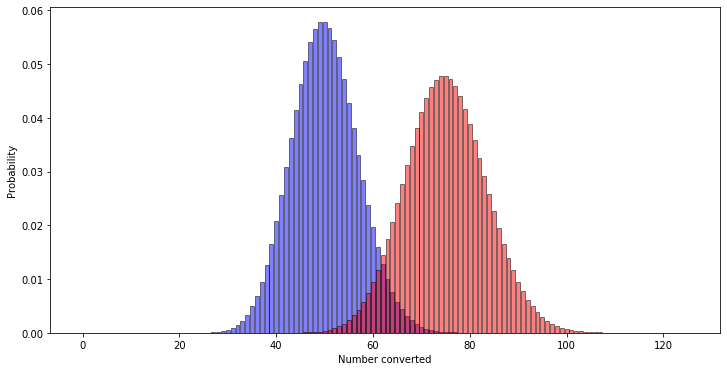

In [153]:
### CHANGE X-AXIS TO CONVERSION FRACTION

# create conversion data
A_conversion_rate = 0.05
A_sample_size = 1000
A_converted = A_conversion_rate*A_sample_size

B_conversion_rate = 0.075
B_sample_size = 1000 
B_converted = B_conversion_rate*B_sample_size

# plot it
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,6))

# set up x-axis
xmin = min([A_converted, B_converted]) - 50
xmax = max([A_converted, B_converted]) + 50
x = np.linspace(xmin, xmax, xmax - xmin + 1)

# create binomial distribution from conversion data
y_A = scs.binom(A_sample_size, A_conversion_rate).pmf(x)
y_B = scs.binom(B_sample_size, B_conversion_rate).pmf(x)
ax.bar(x, y_A, edgecolor='k', color='b', alpha=0.5)
ax.bar(x, y_B, edgecolor='k', color='r', alpha=0.5)

# add confidence intervals
# ax.axvline(x=B_conversion_rate * A_total, c='r', alpha=0.75, linestyle='--')

# set labels
plt.xlabel('Number converted')
plt.ylabel('Probability')
plt.show()
# scs.binom(A_total, A_conversion_rate).pmf(x)

In [1]:
import scipy.stats as scs
import pandas as pd
# import numpy as np


def generate_data(N_A, N_B, p_A, p_B, days=None, control_label='A',
                  test_label='B'):
    """Returns a pandas dataframe with fake CTR data
    Example:
    Parameters:
        N_A (int): sample size for control group
        N_B (int): sample size for test group
            Note: final sample size may not match N_A provided because the
            group at each row is chosen at random (50/50).
        p_A (float): conversion rate; conversion rate of control group
        p_B (float): conversion rate; conversion rate of test group
        days (int): optional; if provided, a column for 'ts' will be included
            to divide the data in chunks of time
            Note: overflow data will be included in an extra day
        control_label (str)
        test_label (str)
    Returns:
        df (df)
    """

    # initiate empty container
    data = []

    # total amount of rows in the data
    N = N_A + N_B

    # distribute events based on proportion of group size
    group_bern = scs.bernoulli(N_A / (N_A + N_B))

    # initiate bernoulli distributions from which to randomly sample
    A_bern = scs.bernoulli(p_A)
    B_bern = scs.bernoulli(p_B)

    for idx in range(N):
        # initite empty row
        row = {}
        # for 'ts' column
        if days is not None:
            if type(days) == int:
                row['ts'] = idx // (N // days)
            else:
                raise ValueError("Provide an integer for the days parameter.")
        # assign group based on 50/50 probability
        row['group'] = group_bern.rvs()

        if row['group'] == 0:
            # assign conversion based on provided parameters
            row['converted'] = A_bern.rvs()
        else:
            row['converted'] = B_bern.rvs()
        # collect row into data container
        data.append(row)

    # convert data into pandas dataframe
    df = pd.DataFrame(data)

    # transform group labels of 0s and 1s to user-defined group labels
    df['group'] = df['group'].apply(
        lambda x: control_label if x == 0 else test_label)

    return df